# Dark Energy Spectroscopic Instrument

Based on the ECHO-22 design with obscurations in [DESI-4037-v6](https://desi.lbl.gov/DocDB/cgi-bin/private/ShowDocument?docid=4037).

Corrector lens refractive properties taken from melt data in [DESI-2880](https://desi.lbl.gov/DocDB/cgi-bin/private/ShowDocument?docid=2880).

In [1]:
import batoid
import os
import yaml
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
DESI_fn = os.path.join(batoid.datadir, 'DESI', 'DESI.yaml')
config = yaml.safe_load(open(DESI_fn))
telescope = batoid.parse.parse_optic(config['opticalSystem'])

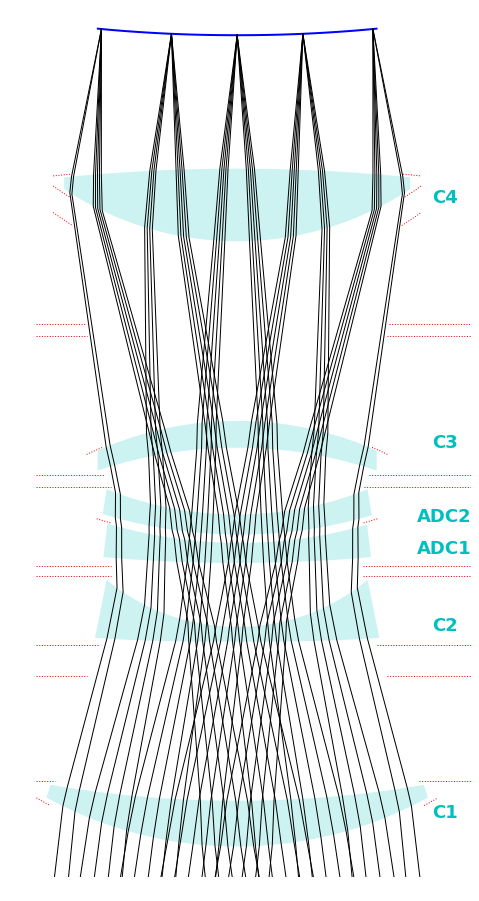

In [3]:
fig, ax = plt.subplots(figsize=(8, 16))

# Draw a 2D (x,z) slice through the corrector.
telescope.draw2d(ax, only=batoid.optic.Lens, fc='c', alpha=0.2,
                 labelpos=0.62, fontdict=dict(fontsize=18, weight='bold', color='c'))
telescope.draw2d(ax, only=batoid.optic.Detector, c='b', lw=2)
telescope.draw2d(ax, only=batoid.optic.Baffle, c='r', lw=1, ls=':')

# Fill the (x, z) plane with rays entering the pupil.
z_pupil = telescope.dist
r_pupil = 0.5 * telescope.pupilSize
x_pupil = np.linspace(-r_pupil, r_pupil, 20)

# Trace and draw 500nm rays from 5 angles covering the field of view.
wlen = 500e-9
fov = np.deg2rad(3.2)
thetas = np.linspace(-0.5 * fov, +0.5 * fov, 5)
for theta in thetas:
    v = [np.sin(theta), 0., -np.cos(theta)]
    rays = batoid.RayVector([
        batoid.Ray([x, 0, z_pupil], v, t=0, wavelength=wlen) for x in x_pupil])
    traceFull = telescope.traceFull(rays)
    batoid.drawTrace2d(ax, traceFull, c='k', lw=1, start='M1', end='FocalPlane')

ax.set_xlim(-0.6, 0.7)
ax.set_ylim(8.6, 11.2)
ax.set_aspect(1.0)
ax.axis('off')
plt.show()